<h1 style="text-align:center">K-Means</h1> 

In [4]:
from __future__ import print_function
import numpy as np
from sklearn.datasets import make_blobs

In [74]:
dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)
dataset

array([[  4.33146409,  -2.16379108],
       [  0.4720218 ,  -4.18635776],
       [  6.06617762,   3.51769848],
       [ -4.87191413,  -8.66686964],
       [  8.06115616,  -4.70674122],
       [  6.3664077 ,  -2.77799287],
       [ -7.10889731,  -6.64486843],
       [ -5.37404215,   9.90217172],
       [ -6.20341826,   1.23266038],
       [ -4.54081827,  -0.80738064],
       [  2.0716282 ,   0.69658714],
       [ -4.8642246 ,   0.64794206],
       [  8.40355259,  -6.19391929],
       [ -2.36553178,   0.4432672 ],
       [-10.72917646,  -0.01952716],
       [ -5.89501097,   4.97611217],
       [ -8.47787239,   2.94695142],
       [  3.99033171,  -4.85910491],
       [  7.05635815,   1.94533428],
       [  9.27798198,  -1.34045195],
       [  1.49961834,  -2.28073493],
       [ -4.49524071,  -0.27620418],
       [ 11.14140749,  -3.25074506],
       [  6.6506993 ,  -8.5632554 ],
       [ -6.63783036,   1.4462297 ],
       [  2.64634492,  -0.54860465],
       [  7.5760228 ,   1.5532672 ],
 

In [132]:
class KMeans:
    def __init__(self, k, iteration = 10):
        self.k = k
        self.iteration = iteration
        self.all_centroids = []
        self.all_labels = []
        
    def fit(self, data_set):
        numFeature = data_set.shape[1]
        old_centroid = None
        centroid = self.get_random_centroids(numFeature)
        self.all_centroids.append(centroid)
        ite = 0
        while not self.should_stop(ite, old_centroid):
            old_centroid = centroid
            ite += 1
            
            labels = self.get_labels(data_set, centroid)
            self.all_labels.append(labels)
            
            centroid = self.get_centroids(data_set, labels)
            self.all_centroids.append(centroid)
            
        return centroid
        
    def get_random_centroids(self, numFeature):
        return np.random.rand(self.k, numFeature)
    
    def get_labels(self,data_set,  centroid):
        labels = []
        for x in data_set:
            distance = np.sum((x - centroid) ** 2, axis = 1)
            label = np.argmin(distance)
            labels.append(label)
            
        return labels
           
    def get_centroids(self, data_set, labels):
        centroids = []
        for i in range(self.k):
            idx_i = np.where(np.array(labels) == i)[0]
            centroid = data_set[idx_i, :].mean(axis = 0)
            centroids.append(centroid)
            
        return np.array(centroids)
    
    def should_stop(self, ite, old_centroid):
        if self.iteration == ite:
            return True
        
        return np.all(old_centroid == self.all_centroids[-1])

In [112]:
labels = [[1,2,3,1], [1,2,3,1], [1,2,1,2]]
idx_i = np.where(np.array(labels)[-1] == 1)[0]
pre[idx_i, :].mean(axis = 0)


array([ 0.11378155, -3.06763302])

In [133]:
kmean = KMeans(2)

In [134]:
centroids = kmean.fit(dataset)

In [135]:
centroids

array([[ 4.58876493, -3.13006162],
       [-4.99023469,  0.44409831]])

In [119]:

class KMean():
  def __init__(self, k, max_iteration=10):
      self.k = k
      self.max_iteration = max_iteration
      self.all_centroids = []
      self.all_labels = []

  # Hàm thuật toán k-Means lấy đầu vào là một bộ dữ liệu và số lượng cluster k. Trẻ về tâm của k cụm
  def fit(self, dataSet):
      # Khởi tạo ngẫu nhiên k centroids
      numFeatures = dataSet.shape[1]
      centroids = self.get_random_centroids(numFeatures, self.k)
      self.all_centroids.append(centroids)
      self.all_labels.append(None)

      # Khởi tạo các biến iterations, oldCentroids
      iterations = 0
      oldCentroids = None
      
      # Vòng lặp cập nhật centroids trong thuật toán k-Means
      while not self.should_stop(oldCentroids, centroids, iterations):
          # Lưu lại centroids cũ cho quá trình kiểm tra hội tụ
          oldCentroids = centroids
          iterations += 1
          
          # Gán nhãn cho mỗi diểm dữ liệu dựa vào centroids
          labels = self.get_labels(dataSet, centroids)
          self.all_labels.append(labels)

          # Cập nhật centroids dựa vào nhãn dữ liệu
          # print('0ld centroids: ', centroids)
          centroids = self.get_centroids(dataSet, labels, self.k)
          # print('new centroids: ', centroids)
          self.all_centroids.append(centroids)
  
      return centroids

  # Hàm khởi tạo centroids ngẫu nhiên
  def get_random_centroids(self, numFeatures, k):
    return np.random.rand(k, numFeatures)
    # return np.array([[-5., -5.],
    #                  [4., 6.]])

  # Hàm này trả về nhãn cho mỗi điểm dữ liệu trong datasets
  def get_labels(self, dataSet, centroids):
      # Với mỗi quan sát trong dataset, lựa chọn centroids gần nhất để gán label cho dữ liệu.
      labels = []
      for x in dataSet:
        # Tính khoảng cách tới các centroids và cập nhận nhãn
        distances = np.sum((x-centroids)**2, axis=1)
        label = np.argmin(distances)
        labels.append(label)
      return labels
      
  # Hàm này trả về True hoặc False nếu k-Means hoàn thành. Điều kiện k-Means hoàn thành là 
  # thuật toán vượt ngưỡng số lượng vòng lặp hoặc centroids ngừng thay đổi
  def should_stop(self, oldCentroids, centroids, iterations):
      if iterations > self.max_iteration: 
        return True
      return np.all(oldCentroids == centroids)

  # Trả về toan độ mới cho k centroids của mỗi chiều.
  def get_centroids(self, dataSet, labels, k):
      centroids = []
      for j in np.arange(k):
        # Lấy index cho mỗi centroids
        idx_j = np.where(np.array(labels) == j)[0]
        centroid_j = dataSet[idx_j, :].mean(axis=0)
        centroids.append(centroid_j)
      return np.array(centroids)

In [122]:
dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)

kmean = KMean(k=2, max_iteration=10)
centroids = kmean.fit(dataset)

IndexError: list index out of range

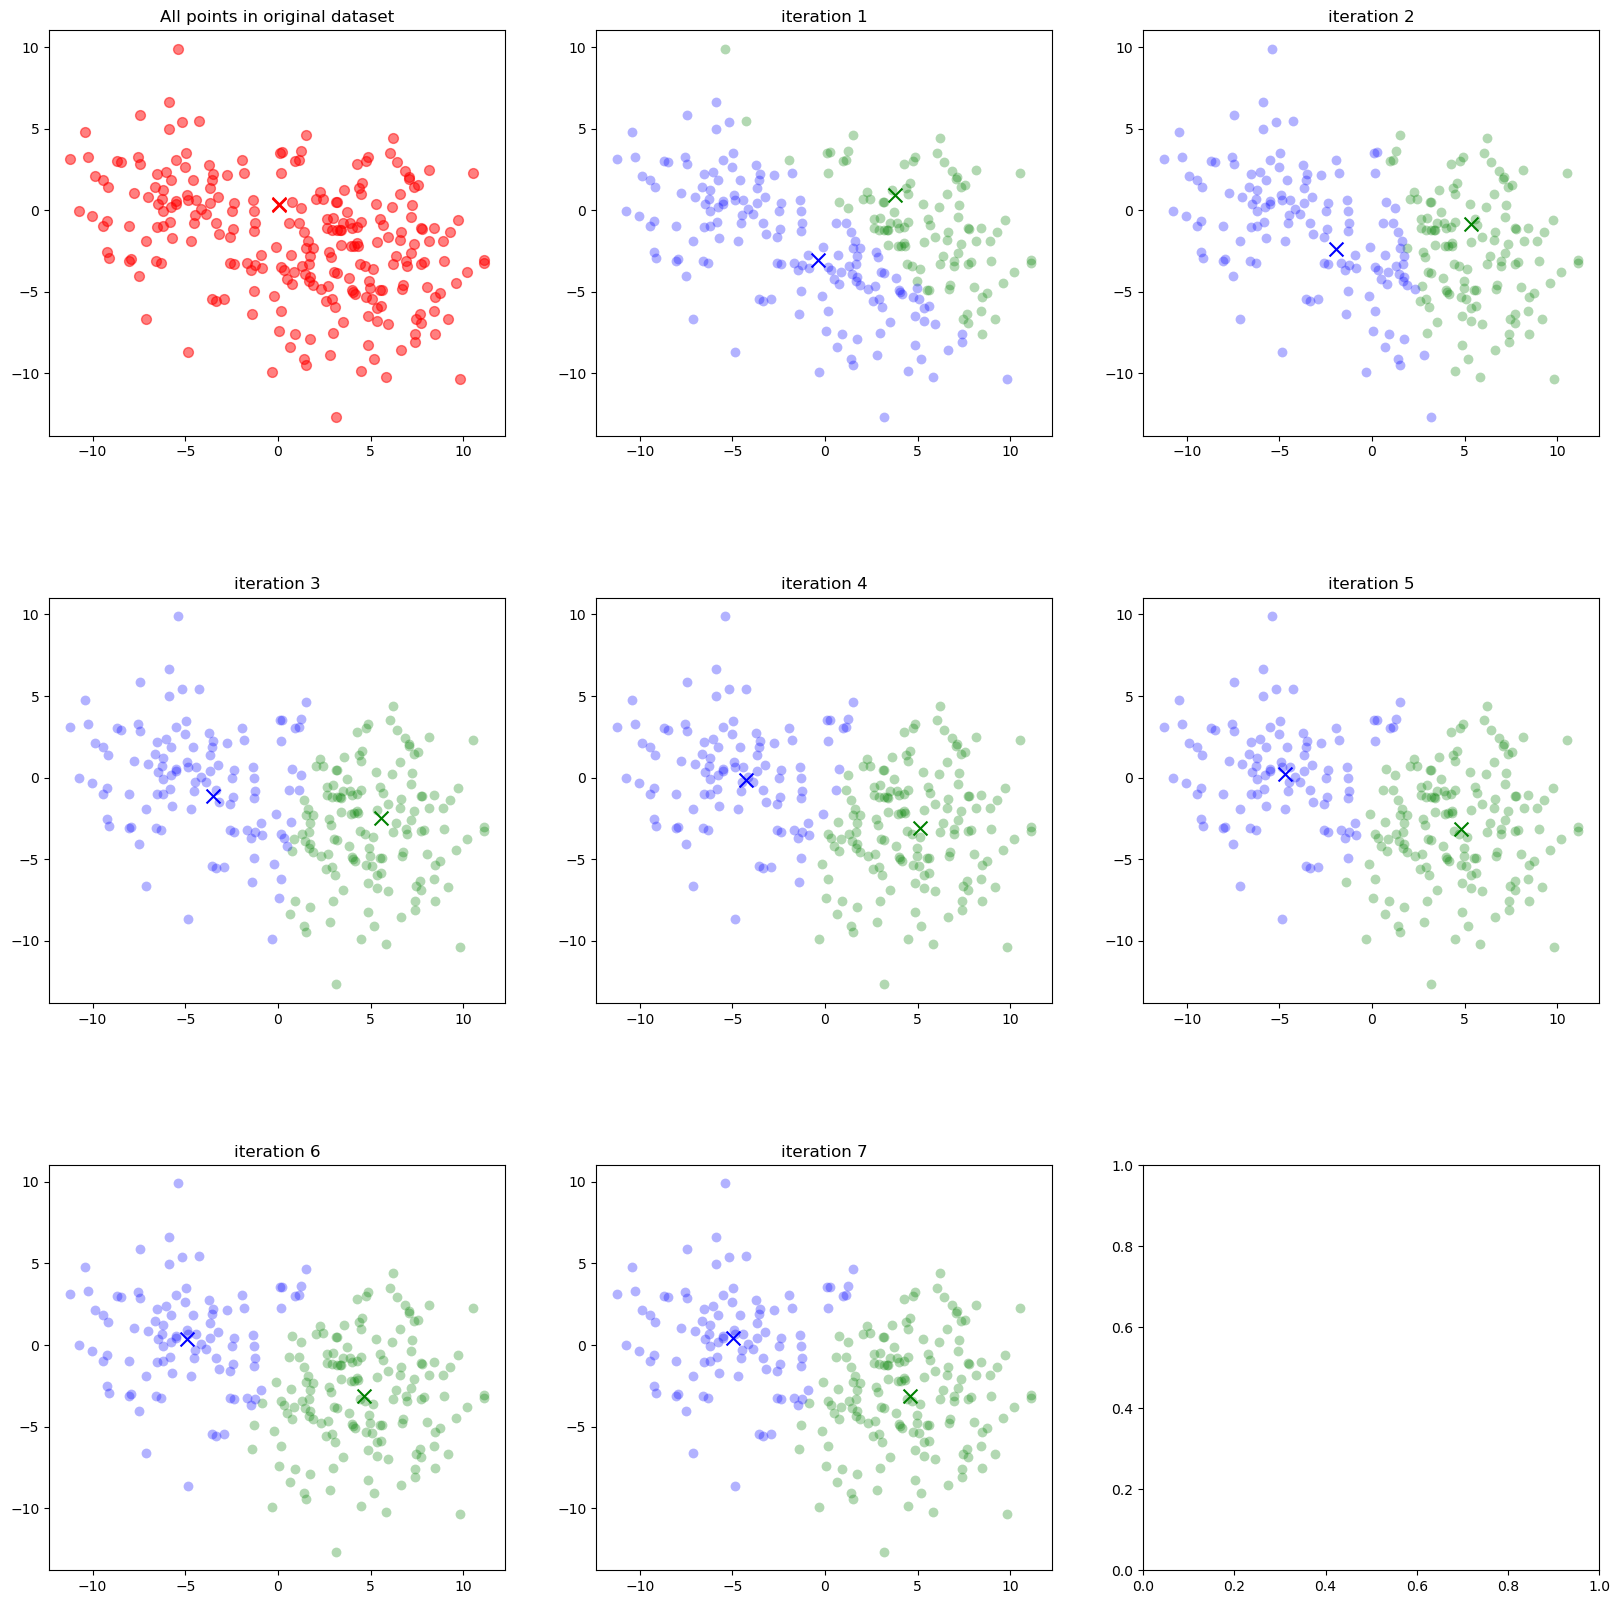

In [136]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(nrows=3, ncols=3)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
colors = ['green', 'blue']
labels = ['cluster 1', 'cluster 2']

for i in np.arange(len(kmean.all_centroids)):
  ax = plt.subplot(gs[i])
  if i == 0:
    centroids_i = kmean.all_centroids[i]
    plt.scatter(dataset[:, 0], dataset[:, 1], s=50, alpha=0.5, color='red')
    for j in np.arange(kmean.k):
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', s=100, color='red')
    plt.title('All points in original dataset')
  else:
    # Lấy centroids và labels tại bước thứ i
    centroids_i = kmean.all_centroids[i]
    labels_i = kmean.all_labels[i]
    # Visualize các điểm cho từng cụm
    for j in np.arange(kmean.k):
      idx_j = np.where(np.array(labels_i) == j)[0]
      plt.scatter(dataset[idx_j, 0], dataset[idx_j, 1], color=colors[j], label=labels[j], s=50, alpha=0.3, lw = 0)
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', color=colors[j], s=100, label=labels[j])
    plt.title(r'iteration {}'.format(i))

In [148]:
class KMeans:
    def __init__(self, k, max_iterations = 10):
        self.max_iterations = max_iterations
        self.k = k
        self.all_labels = []
        self.all_centroids = []
        
    def should_stop(self, ite, old_centroids):
        if ite == self.max_iterations:
            return True
        return np.all(old_centroids == self.all_centroids[-1])
    
    def get_labels(self, data_set, centroids):
        labels = []
        for x in data_set:
            distance = np.sum((x - centroids) ** 2, axis = 1)
            label = np.argmin(distance)
            labels.append(label)
            
        return labels        # List
    
    def get_centroids(self, data_set, labels):
        # sum(1{ci == j} * xi) / sum(1{ci == j})
        centroids = []
        for i in np.arrange(self.k):
            idx_i = np.where(np.array(labels) == i)[0]
            centroid_j = data_set[idx_i, :].mean(axis = 0)
            centroids.append(centroid_j)
            
        return np.array(centroids)
    
    def get_random_centroids(self, num_feature):
        return np.random.rand(self.k, num_feature)
        
    def fit(self, data_set):
        ite = 0
        num_feature = data_set.shape[1]
            
        # centroid
        old_centroid = None
        centroid = self.get_random_centroids(num_feature)
        self.all_centroids.append(centroid)
        
        while not self.should_stop(ite, old_centroid, centroid):
            ite += 1
            old_centroid = centroid
            
            # Labels
            label = self.get_labels(data_set, centroid)
            self.all_labels.append(label)
            
            # Centroids
            centroid = self.get_centroids(data_set, label)
            self.all_centroids.append(centroid)

        return centroid

In [149]:
kmean = KMeans(k = 3, max_iterations = 10)

In [150]:
data_set, _ = make_blobs(40)

In [151]:
centroid = kmean.fit(data_set)

TypeError: should_stop() takes 3 positional arguments but 4 were given